<a href="https://colab.research.google.com/github/yashpickles/-Minimizing-Churn-of-Subscription-product-through-Analysis-of-Financial-Habits/blob/main/Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Case-Study:** **Minimizing Churn of Subscription product through Analysis of Financial Habits**
## **-Yash Acharya**

### **1) Problem Statement**
Subscription products often are the main source of revenue for the companies for all industries. These products can come in the form of a 'one size fits all' overcompassing subscription or in a multi-level memberships. Regardless of how they structure their memberships or what industries they are in. Companies almost always try to minimize Customer Churn(a.k.a subscription cancellations). To retain their customers these companies first need to identify behavioural patterns that act as a catalyst in disengagement with the product.

**Market**: The target audience is the entirety of companies subscription. They are the ones that company wants. 

**Product**: The subcription products that the customers are already enrolled in can provide value that users may not have imagined or that they may have forgotten.

**Goal**: The Objective of this model is to predict which users are most likely to churn, so that the company can focus on re-engaging these users with the product. These efforts can be email remainders about the benefits of the product, especially focusing on features that are new or that the user has shown to value. 

### **2) Importing the Libraries** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

### **3) Importing the Dataset**

In [2]:
dataset = pd.read_csv('New_churn_data1.csv')

### **4) Data Preparation**

In [3]:
user_identifier = dataset['user']
dataset = dataset.drop(columns=['user'])

### **5) Encoding**

In [4]:
dataset.housing.value_counts()
dataset.groupby('housing')['churn'].nunique().reset_index()
dataset = pd.get_dummies(dataset)


In [5]:
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [6]:
dataset = dataset.drop(columns=['housing_na', 'zodiac_sign_na', 'payment_type_na'])

### **6) Splitting the Dataset into Training and Test set**

In [7]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

### **7) Balancing the Training set**

In [8]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [9]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index


In [10]:
random.seed(0)
higher = np.random.choice(higher, len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))
X_train = X_train.loc[new_indexes, ]
y_train = y_train[new_indexes]

### **8) Feature Scalling**

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))

In [12]:
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [13]:
X_train

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11695,-0.615443,-0.355603,-0.28729,-0.591356,-0.355366,-0.166126,-0.909690,-0.060402,-0.072766,-0.570011,0.225061,-1.246856,-0.808055,0.840302,-0.462817,-0.030849,-0.142735,-0.142939,-0.074237,-0.458602,-0.137337,-0.517490,-0.681802,-0.298299,1.231765,-0.940682,-0.328966,-0.317248,2.019431,3.472842,-0.281405,-0.312958,-0.157724,-0.292817,-0.310258,-0.288176,-0.293942,-0.286694,-0.294391,-0.299853,-0.319379
19766,-0.415583,-0.355603,-0.28729,-0.640121,-0.355366,-0.166126,0.323505,1.202751,-0.072766,-0.570011,0.225061,0.802017,-0.808055,0.840302,-0.462817,-0.030849,-0.142735,-0.142939,-0.074237,-0.458602,-0.137337,0.948999,-0.681802,-0.298299,-0.811843,1.063058,-0.328966,-0.317248,-0.495189,-0.287949,-0.281405,-0.312958,-0.157724,-0.292817,-0.310258,3.470097,-0.293942,-0.286694,-0.294391,-0.299853,-0.319379
8354,0.283930,-0.355603,-0.28729,-0.640121,-0.355366,-0.166126,2.013438,-0.060402,-0.072766,-0.244776,0.225061,0.802017,-0.808055,0.840302,-0.462817,-0.030849,-0.142735,-0.142939,-0.074237,-0.458602,-0.137337,1.388946,-0.681802,-0.298299,-0.811843,-0.940682,-0.328966,-0.317248,-0.495189,-0.287949,-0.281405,-0.312958,-0.157724,-0.292817,-0.310258,-0.288176,-0.293942,-0.286694,-0.294391,-0.299853,3.131074
17883,0.583721,-0.355603,-0.28729,0.042583,-0.355366,-0.166126,-0.178908,-0.060402,-0.072766,-0.000850,0.225061,0.802017,1.237539,-1.190049,-0.462817,-0.030849,-0.142735,-0.142939,-0.074237,-0.458602,-0.137337,-0.650807,1.466702,-0.298299,1.231765,-0.940682,-0.328966,-0.317248,2.019431,-0.287949,-0.281405,-0.312958,-0.157724,-0.292817,-0.310258,-0.288176,-0.293942,-0.286694,-0.294391,3.334971,-0.319379
25149,-0.815304,-0.240965,-0.28729,-0.103711,-0.238428,-0.166126,-0.578554,-0.060402,-0.072766,-0.244776,0.225061,-1.246856,1.237539,-1.190049,-0.462817,-0.030849,-0.142735,-0.142939,-0.074237,-0.458602,-0.137337,-0.557485,1.466702,-0.298299,1.231765,-0.940682,-0.328966,-0.317248,2.019431,-0.287949,-0.281405,-0.312958,-0.157724,-0.292817,-0.310258,-0.288176,3.402035,-0.286694,-0.294391,-0.299853,-0.319379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,1.283233,-0.355603,-0.28729,-0.640121,-0.355366,1.958577,1.522444,1.202751,-0.072766,2.763642,0.225061,0.802017,1.237539,-1.190049,-0.462817,-0.030849,-0.142735,-0.142939,-0.074237,-0.458602,-0.137337,1.575590,-0.681802,-0.298299,1.231765,-0.940682,-0.328966,3.152107,-0.495189,-0.287949,-0.281405,3.195314,-0.157724,-0.292817,-0.310258,-0.288176,-0.293942,-0.286694,-0.294391,-0.299853,-0.319379
15423,1.383163,-0.355603,-0.28729,-0.640121,-0.355366,6.207982,1.853580,3.729059,-0.072766,0.812236,0.225061,0.802017,-0.808055,0.840302,-0.462817,-0.030849,-0.142735,-0.142939,-0.074237,-0.458602,-0.137337,1.882220,-0.681802,3.352341,-0.811843,1.063058,-0.328966,-0.317248,-0.495189,-0.287949,-0.281405,-0.312958,-0.157724,-0.292817,-0.310258,-0.288176,-0.293942,-0.286694,3.396847,-0.299853,-0.319379
4097,0.983442,2.395715,-0.28729,-0.323151,2.334207,6.207982,1.579536,2.465905,-0.072766,3.088876,0.225061,0.802017,1.237539,-1.190049,-0.462817,-0.030849,-0.142735,-0.142939,-0.074237,-0.458602,-0.137337,1.042321,1.466702,-0.298299,1.231765,-0.940682,-0.328966,-0.317248,2.019431,-0.287949,-0.281405,-0.312958,-0.157724,-0.292817,-0.3102

In [14]:
X_test

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,app_downloaded,web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred,housing_O,housing_R,payment_type_Bi-Weekly,payment_type_Monthly,payment_type_Semi-Monthly,payment_type_Weekly,zodiac_sign_Aquarius,zodiac_sign_Aries,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
2834,-0.015861,0.905418,-0.287290,-0.615739,0.930952,1.958577,1.248401,-0.060402,-0.072766,1.869247,0.225061,-1.246856,-0.808055,0.840302,-0.462817,-0.030849,-0.142735,-0.142939,-0.074237,-0.458602,-0.137337,0.948999,-0.681802,-0.298299,-0.811843,-0.940682,-0.328966,-0.317248,2.019431,-0.287949,-0.281405,-0.312958,-0.157724,-0.292817,-0.310258,-0.288176,-0.293942,3.488040,-0.294391,-0.299853,-0.319379
21018,-0.715374,-0.355603,-0.287290,2.480811,-0.355366,-0.166126,1.716558,-0.060402,-0.072766,-0.407393,0.225061,0.802017,-0.808055,0.840302,-0.462817,-0.030849,-0.142735,-0.142939,13.470300,-0.458602,-0.137337,1.082316,-0.681802,-0.298299,1.231765,1.063058,-0.328966,-0.317248,-0.495189,-0.287949,-0.281405,-0.312958,-0.157724,3.415097,-0.310258,-0.288176,-0.293942,-0.286694,-0.294391,-0.299853,-0.319379
5590,1.483094,0.905418,1.605741,-0.640121,0.930952,-0.166126,0.437689,2.465905,-0.072766,2.194482,0.225061,-1.246856,-0.808055,0.840302,-0.462817,-0.030849,-0.142735,-0.142939,-0.074237,-0.458602,-0.137337,0.948999,1.466702,-0.298299,1.231765,1.063058,-0.328966,-0.317248,-0.495189,-0.287949,-0.281405,-0.312958,-0.157724,-0.292817,-0.310258,-0.288176,-0.293942,-0.286694,-0.294391,3.334971,-0.319379
15769,0.084069,-0.355603,-0.287290,-0.445063,-0.355366,-0.166126,-1.001038,-0.060402,-0.072766,-0.570011,0.225061,-1.246856,1.237539,-1.190049,1.693579,-0.030849,-0.142735,-0.142939,-0.074237,-0.458602,-0.137337,-0.517490,1.466702,-0.298299,-0.811843,-0.940682,-0.328966,-0.317248,2.019431,-0.287949,-0.281405,-0.312958,6.340202,-0.292817,-0.310258,-0.288176,-0.293942,-0.286694,-0.294391,-0.299853,-0.319379
15120,-1.015165,0.332226,-0.287290,3.187898,0.346262,-0.166126,1.750813,-0.060402,-0.072766,2.113173,0.225061,0.802017,1.237539,-1.190049,-0.462817,-0.030849,-0.142735,-0.142939,-0.074237,2.180538,-0.137337,1.348951,1.466702,-0.298299,1.231765,1.063058,-0.328966,-0.317248,-0.495189,-0.287949,-0.281405,-0.312958,-0.157724,-0.292817,3.223125,-0.288176,-0.293942,-0.286694,-0.294391,-0.299853,-0.319379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16090,4.481004,-0.355603,-0.287290,-0.640121,-0.355366,-0.166126,-1.012456,-0.060402,-0.072766,-0.651319,0.225061,0.802017,1.237539,-1.190049,-0.462817,-0.030849,-0.142735,-0.142939,-0.074237,-0.458602,-0.137337,-1.184076,-0.681802,-0.298299,-0.811843,-0.940682,-0.328966,-0.317248,2.019431,-0.287949,-0.281405,-0.312958,-0.157724,-0.292817,-0.310258,-0.288176,-0.293942,3.488040,-0.294391,-0.299853,-0.319379
9851,0.583721,-0.240965,0.659226,-0.615739,-0.238428,-0.166126,-1.023875,-0.060402,-0.072766,-0.651319,0.225061,-1.246856,-0.808055,0.840302,-0.462817,-0.030849,-0.142735,-0.142939,-0.074237,-0.458602,-0.137337,-1.184076,-0.681802,-0.298299,-0.811843,-0.940682,3.039827,-0.317248,-0.495189,-0.287949,-0.281405,-0.312958,-0.157724,-0.292817,-0.310258,-0.288176,-0.293942,-0.286694,-0.294391,-0.299853,-0.319379
654,0.483790,-0.355603,-0.287290,-0.640121,-0.355366,1.958577,1.294075,-0.060402,-0.072766,-0.082159,0.225061,0.802017,1.237539,-1.190049,-0.462817,-0.030849,-0.142735,-0.142939,-0.074237,-0.458602,-0.137337,0.642370,-0.681802,-0.298299,1.231765,-0.940682,-0.328966,-0.317248,-0.495189,-0.287949,-0.281405,-0.312958,-0.157724,-0.292817,

### **9) Model Building**

### **9.a) Training the Logistic Regression model on the Training set**

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### **9.b) Predicting the Test set**

In [16]:
y_pred = classifier.predict(X_test)

### **10) Evaluating the Results**

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.53      0.61      3166
           1       0.52      0.74      0.61      2234

    accuracy                           0.61      5400
   macro avg       0.63      0.63      0.61      5400
weighted avg       0.65      0.61      0.61      5400



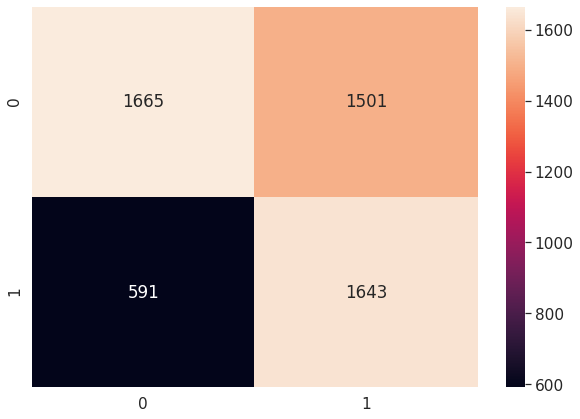

In [19]:
df_cm = pd.DataFrame(cm, index=(0, 1), columns=(0, 1))
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')

In [20]:
print("Test Data Accuracy: %0.4f" %accuracy_score(y_test, y_pred))

Test Data Accuracy: 0.6126


### **11) Applying K-fold Cross Validation**

In [23]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("SVM Accuracy: %0.3f (+/-%0.3f)" %(accuracy.mean(), accuracy.std()*2))

SVM Accuracy: 0.648 (+/-0.028)


### **12) Analyzing Co-efficients**

In [26]:
pd.concat([pd.DataFrame(X_train.columns, columns=["Features"]), 
            pd.DataFrame(np.transpose(classifier.coef_), columns=["coef"])], axis=1)

,Features,coef
0,age,-0.160125
1,deposits,0.616553
2,withdrawal,0.030684
3,purchases_partners,-0.730355
4,purchases,-0.719906
5,cc_taken,0.069197
6,cc_recommended,0.100539
7,cc_disliked,-0.000427
8,cc_liked,0.038043
9,cc_application_begin,0.006744


### **13) Feature Selection**

### **13.a) Recursive Feature Elimination**

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)

In [28]:
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]


[ True  True False  True  True  True  True False False False False  True
  True False  True False  True  True  True  True  True  True False  True
  True  True False  True  True False False False False False False False
 False False False False False]
[ 1  1  4  1  1  1  1 21  2 16  7  1  1 12  1  8  1  1  1  1  1  1 22  1
  1  1 14  1  1 18  5 10  3 19 15 11  6  9 20 17 13]


Index(['age', 'deposits', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'web_user', 'ios_user', 'registered_phones',
       'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'housing_O', 'housing_R', 'payment_type_Bi-Weekly',
       'payment_type_Semi-Monthly', 'payment_type_Weekly'],
      dtype='object')

### **13.b) New Correlational Matrix**

In [30]:
sns.set(style="white")

In [31]:
corr = X_train[X_train.columns[rfe.support_]].corr()

In [32]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [ ]:
f, ax = plt.subplots(figsize=(18, 15))

In [34]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

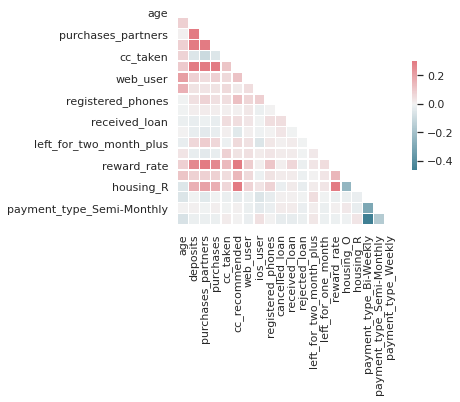

In [35]:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})    


### **14) Fitting the model to the Training set**

In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### **15) Predicitng the Test set**

In [37]:
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])

### **16) Evaluating the Model**

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.52      0.61      3166
           1       0.52      0.74      0.61      2234

    accuracy                           0.61      5400
   macro avg       0.63      0.63      0.61      5400
weighted avg       0.65      0.61      0.61      5400



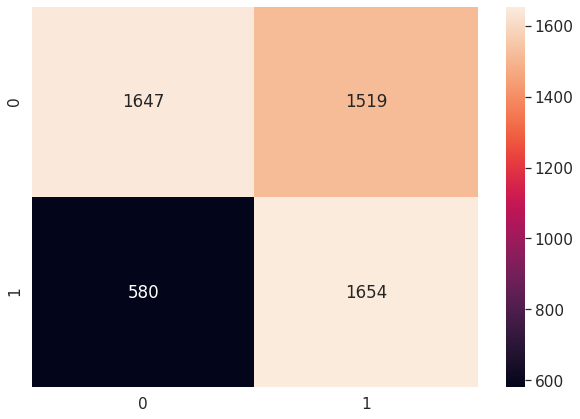

In [39]:
df_cm = pd.DataFrame(cm, index=(0, 1), columns=(0, 1))
plt.figure(figsize=(10, 7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')

In [40]:
print("Test Data Accuracy: %0.4f" %accuracy_score(y_test, y_pred))

Test Data Accuracy: 0.6113


### **17) Applying K-fold Cross Validation**

In [41]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                             X = X_train[X_train.columns[rfe.support_]],
                             y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM Accuracy: 0.646 (+/- 0.025)


### **18) Analyzing Co-efficients**

In [42]:
pd.concat([pd.DataFrame(X_train[X_train.columns[rfe.support_]].columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.155423
1,deposits,0.629131
2,purchases_partners,-0.733280
3,purchases,-0.715473
4,cc_taken,0.076884
5,cc_recommended,0.107912
6,web_user,0.135977
7,ios_user,0.081951
8,registered_phones,0.102756
9,cancelled_loan,0.087722


### **19) Formatting the Final Results**

In [44]:
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred


In [46]:
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)
print(final_results)

       user  churn  predicted_churn
0     61353    1.0                1
1     67679    0.0                0
2     21269    0.0                0
3     69531    0.0                1
4     25997    0.0                0
...     ...    ...              ...
5395  22377    0.0                1
5396  24291    1.0                1
5397  23740    0.0                1
5398  47663    1.0                0
5399  52752    1.0                1

[5400 rows x 3 columns]
